In [1]:
import netCDF4 as nc

import matplotlib as mpl
from matplotlib import pyplot as plt

import numpy as np
import xarray as xr

from scipy import signal
import scipy

In [2]:
path = '/Users/zcaspar/codes/Diagnostics/'

### Correlation functions for different part of the total signal removed (linear trend, average field (1d and 2), both)

In [25]:
corr = {}
removed = ['trend','avg1d + trend','avg1d','avg2d']
for name,data in zip(removed,
                     ['Lcorr_20.nc','drifters_corr_20avg1dd_ZC.nc','drifters_corr20_ZC.nc',
                      'drifters_corr_20avg2d_ZC.nc']):
    corr[name] = xr.open_dataset(path+data)
    for v in ['uu', 'vv']:
        corr[name][v+'_normalized'] = corr[name][v]/corr[name][v].sel(lag=0)
    for v in ['uv', 'vu']:
        corr[name][v+'_normalized'] = corr[name][v]/np.sqrt(corr[name]['uu'].sel(lag=0)*corr[name]['vv'].sel(lag=0))

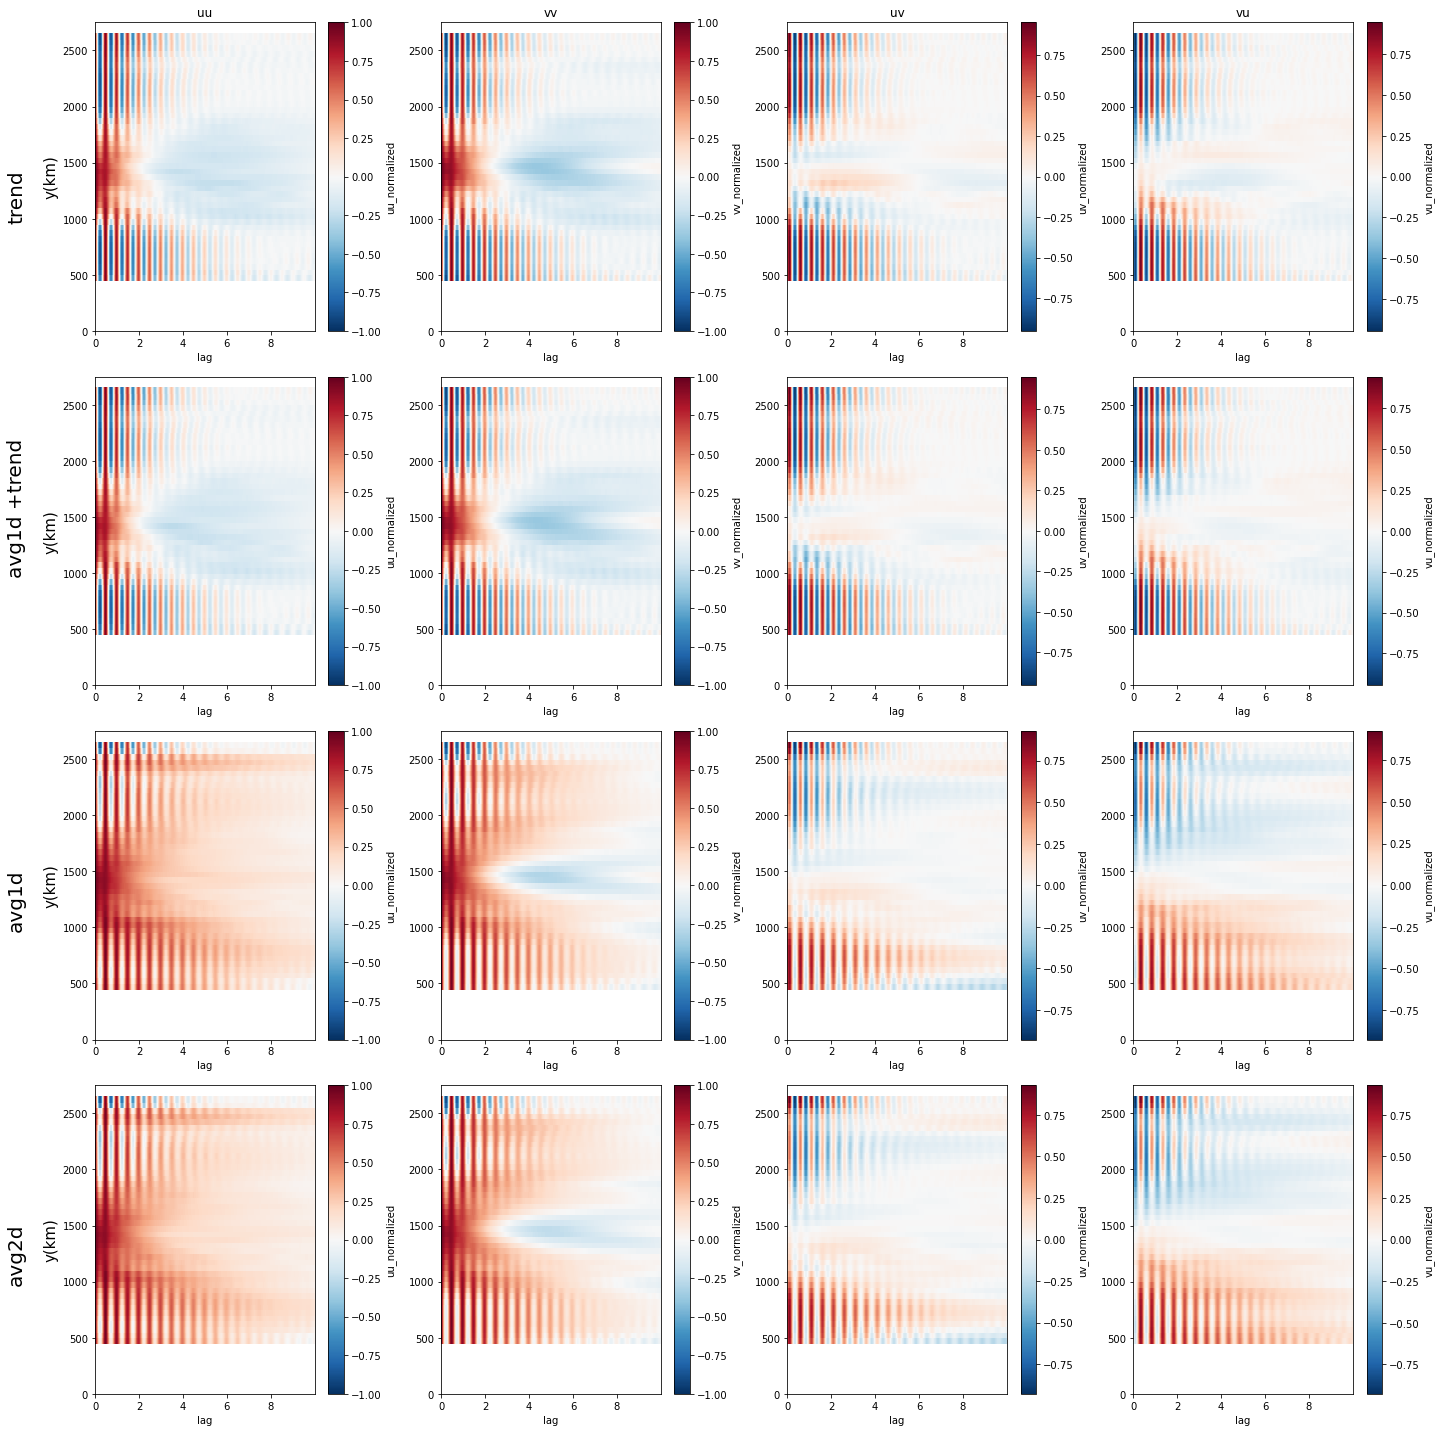

In [43]:
fig,axs = plt.subplots(len(removed),4,figsize=(20,20))
for i,name in enumerate(removed):
    for V,ax in zip(['uu','vv','uv','vu'],axs[i,:]):
        corr[name][V+'_normalized'].plot(ax=ax);ax.set_ylabel('')
    axs[i,0].text(-4,1000,name,fontsize=20,rotation=90);axs[i,0].set_ylabel('y(km)',fontsize=15)
axs[0,0].set_title('uu');axs[0,1].set_title('vv');axs[0,2].set_title('uv');axs[0,3].set_title('vu')
fig.tight_layout()

#### Comments:
The negative lobe observed for the autocorrelation of u seems to be caused by the detrending since it is not observed when only an averaged field is removed to the signal.\
For v, the area where a negative lobe is narrower in the case where the average was removed.\
Those narrowing and disappearing of the neagative lobe were also observed for larger time windows.

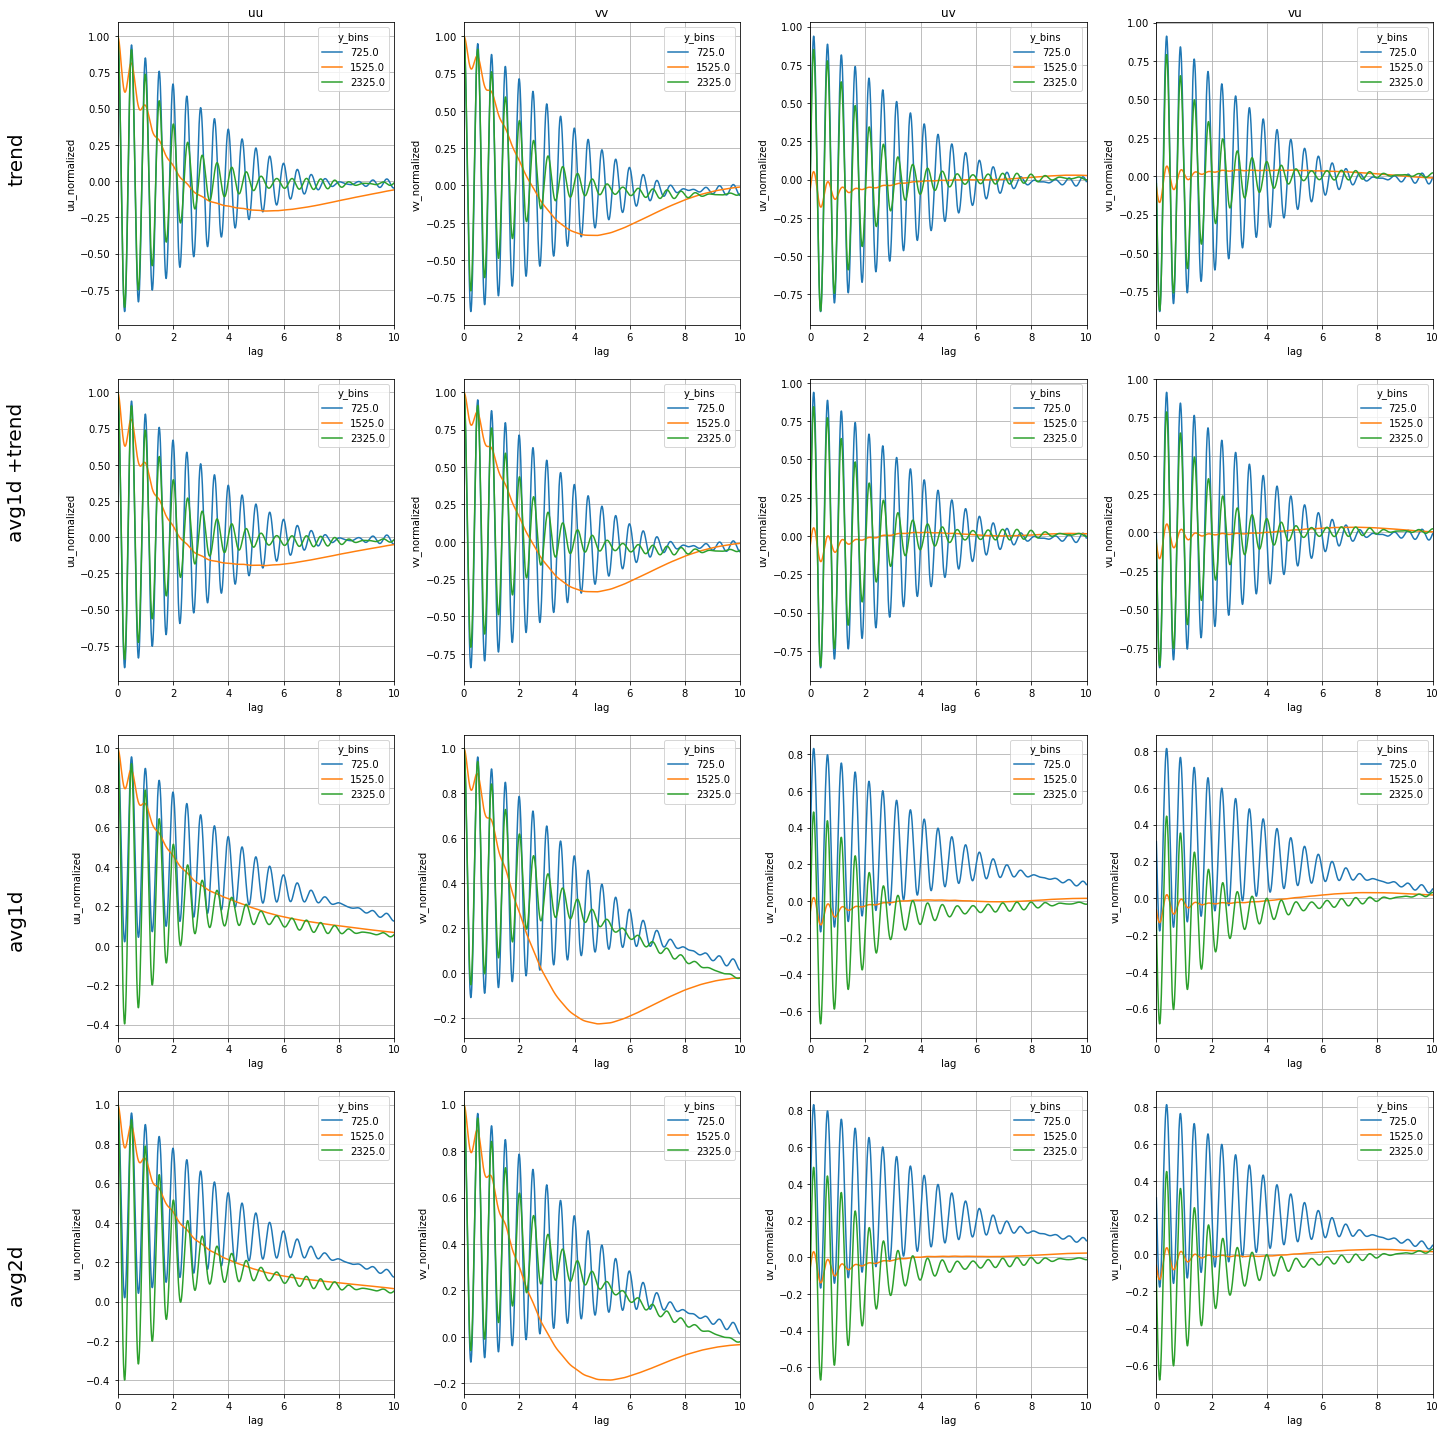

In [44]:
Y=[700,1500,2300]
fig,axs = plt.subplots(len(removed),4,figsize=(20,20))
for i,name in enumerate(removed):
    for V,ax in zip(['uu','vv','uv','vu'],axs[i,:]):
        corr[name][V+'_normalized'].sel(y_bins=Y,method='nearest').plot(ax=ax, x='lag', hue='y_bins')
        ax.set_xlim(0,10);ax.grid()
    axs[i,0].text(-4,0,name,fontsize=20,rotation=90)
axs[0,0].set_title('uu');axs[0,1].set_title('vv');axs[0,2].set_title('uv');axs[0,3].set_title('vu')
fig.tight_layout()

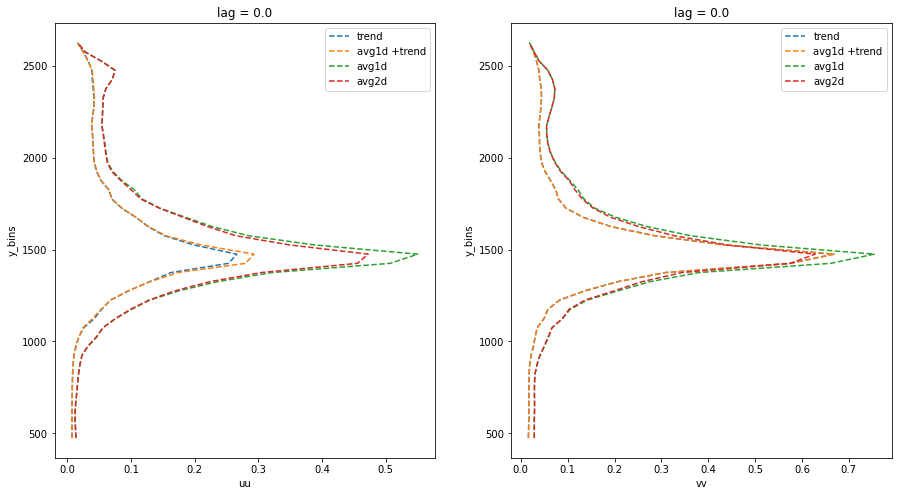

In [53]:
fig,axs = plt.subplots(1,2,figsize=(15,8))
for V,ax in zip(['uu','vv'],axs):
    for name in removed:
        corr[name][V].sel(lag=0).plot.line('--',ax=ax,y='y_bins',label=name)
    ax.legend()